In [1]:
import numpy as np
import serpentTools as st
from snapReactors.reactor_models.AutomatedSerpentModels.GCU.c3_radial_sens_2d.utilitities import*
import os
from numpy.linalg import norm
import matplotlib.image as mpimg

100 100 100 100  101 101 101  


In [2]:
print(os.getcwd())

/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS


In [47]:
# coreresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_coreres.main_res.m'
# coreres = st.read(coreresFile)

# ringresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_ringres.main_res.m'
# ringres = st.read(ringresFile)

# elemresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_elemres.main_res.m'
# elemres = st.read(elemresFile)

layers  = [5, 10, 20]

files = [0]*len(layers)

for i in range(0, len(layers)):
    files[i] = st.read('snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_lay{}_1.main_res.m'.format(layers[i]))

SERPENT Serpent 2.2.1 found in snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_lay5_1.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.2.1 found in snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_lay10_1.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.2.1 found in snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_lay20_1.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


In [48]:
ref3DFile = 'snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_1.main_res.m'
ref3Dres = st.read(ref3DFile)

SERPENT Serpent 2.2.1 found in snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_1.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


### System Analysis

In [49]:
rootUni = '0'
rootUniData = ref3Dres.universes[rootUni, 0, 0, 0]

In [50]:
rootUniData.infExp.keys()

dict_keys(['infMicroFlx', 'infKinf', 'infFlx', 'infFissFlx', 'infTot', 'infCapt', 'infAbs', 'infFiss', 'infNsf', 'infNubar', 'infKappa', 'infInvv', 'infScatt0', 'infScatt1', 'infScatt2', 'infScatt3', 'infScatt4', 'infScatt5', 'infScatt6', 'infScatt7', 'infScattp0', 'infScattp1', 'infScattp2', 'infScattp3', 'infScattp4', 'infScattp5', 'infScattp6', 'infScattp7', 'infTranspxs', 'infDiffcoef', 'infRabsxs', 'infRemxs', 'infI135Yield', 'infXe135Yield', 'infPm147Yield', 'infPm148Yield', 'infPm148mYield', 'infPm149Yield', 'infSm149Yield', 'infI135MicroAbs', 'infXe135MicroAbs', 'infPm147MicroAbs', 'infPm148MicroAbs', 'infPm148mMicroAbs', 'infPm149MicroAbs', 'infSm149MicroAbs', 'infI135MacroAbs', 'infXe135MacroAbs', 'infPm147MacroAbs', 'infPm148MacroAbs', 'infPm148mMacroAbs', 'infPm149MacroAbs', 'infSm149MacroAbs', 'infChit', 'infChip', 'infChid', 'infS0', 'infS1', 'infS2', 'infS3', 'infS4', 'infS5', 'infS6', 'infS7', 'infSp0', 'infSp1', 'infSp2', 'infSp3', 'infSp4', 'infSp5', 'infSp6', 'infSp7

<AxesSubplot:xlabel='Energy [MeV]', ylabel='Cross Section  $\\pm3\\sigma$ [cm$^{-1}$]'>

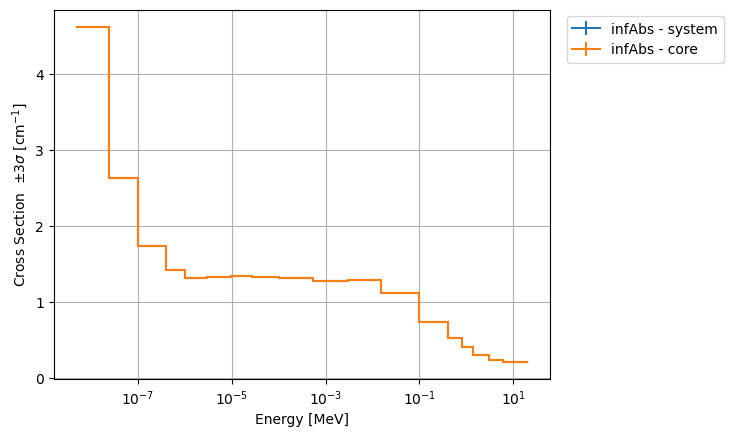

In [51]:
ax = rootUniData.plot('infTot', labels=['infAbs - system'])
ax.grid()
rootUniData.plot('infTot', ax=ax, labels = ['infAbs - core'], legend='right')

In [52]:
def condense(universe, key, useInvFlux = False):
    cond = None
    if useInvFlux:
        invFlux = np.zeros(len(universe.infExp[key]))
        for i in range(0, len(invFlux)):
            invFlux[i] = 1/universe.infExp[key][i]
        cond = np.sum(np.multiply(universe.infExp[key], invFlux)/np.sum(invFlux))
    else:
        cond = np.sum(np.multiply(universe.infExp[key], universe.infExp['infFlx']))/np.sum(universe.infExp['infFlx'])
    return cond

In [53]:
fluxweight_coreTranspxs = condense(rootUniData, 'infTranspxs')
invfluxweight_coreTranspxs = condense(rootUniData, 'infTranspxs', useInvFlux=True)

fluxweight_coreDiff = 1/(3*fluxweight_coreTranspxs)
invfluxweight_coreDiff = 1/(3*invfluxweight_coreTranspxs)

print("fluxweighted infTranspxs : {:.3f}".format(fluxweight_coreTranspxs))
print("invfluxweighted infTranspxs : {:.3f}".format(invfluxweight_coreTranspxs))

print("fluxweighted infDiff : {:.3f}".format(fluxweight_coreDiff))
print("invfluxweighted infDiff : {:.3f}".format(invfluxweight_coreDiff))

coreAbs = condense(rootUniData, 'infAbs')

fluxweight_coreDiffLen = np.sqrt(fluxweight_coreDiff/coreAbs)
invfluxweight_coreDiffLen = np.sqrt(invfluxweight_coreDiff/coreAbs)

print("fluxweighted infDiffLen : {:.3f}".format(fluxweight_coreDiffLen))
print("invfluxweighted infDiffLen : {:.3f}".format(invfluxweight_coreDiffLen))  

fluxweighted infTranspxs : 0.485
invfluxweighted infTranspxs : 0.357
fluxweighted infDiff : 0.688
invfluxweighted infDiff : 0.933
fluxweighted infDiffLen : 4.306
invfluxweighted infDiffLen : 5.017


### Radial GCU Resolution Study 2D

####  Make Sure Cases are unbiased torwards statistics on few-group data

In [54]:
maxs = []
max = None
for uni in ref3Dres.universes:
    maxs.append(np.max(ref3Dres.universes[uni].infUnc['infTot']))
print(np.max(maxs))

0.0087


#### Keff Comparison

In [55]:
reffKeff = ref3Dres.resdata['absKeff']
print("Reference Serpent Keff: {:.5}, pcm: {}".format(reffKeff[0],reffKeff[1]*1e5))

Reference Serpent Keff: 1.4489, pcm: 7.3


In [56]:
resDFs = [0]*len(layers)

for i in range(0, len(layers)):
    resDFs[i] = postProcess('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_lay{}_out.csv'.format(layers[i]), isSteady=True)

In [57]:
def kToPCM(k):
    return 1e5*((k-1)/k)

In [58]:
eigenVals = [0]*len(layers)

for i in range(0, len(layers)):
    eigenVals[i] = resDFs[i]['eigenvalue'][1]
    print("lay{} resolution keff: {:.5f}, pcmDiff: {:.1f}".format(layers[i], eigenVals[i], kToPCM(eigenVals[i]) - kToPCM(reffKeff[0])))

lay5 resolution keff: 1.45264, pcmDiff: 178.9
lay10 resolution keff: 1.45282, pcmDiff: 187.9
lay20 resolution keff: 1.45224, pcmDiff: 160.3


#### Verification of Few Group Spectrum

In [59]:
fgs_hr18 = [5.0000E-09, 2.5000E-08, 1.0000E-07, 4.0000E-07, 9.9600E-07, 3.0000E-06,
9.8770E-06, 2.7700E-05, 1.0000E-04, 5.5000E-04, 3.0000E-03, 1.5030E-02,
1.0000E-01, 4.0000E-01, 8.2100E-01, 1.3530E+00, 3.0000E+00, 6.0655E+00,
2.0000E+01]

In [60]:
# refFGSFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres.main_det0.m'
# refFGSDet = st.read(refFGSFile)
# refFGS = refFGSDet['fgs_spec']

In [61]:
def normZeroToOne(arr):
    normArr = np.zeros(len(arr))
    min = np.min(arr)
    max = np.max(arr)
    for i in range(0, len(arr)):
        normArr[i] = (arr[i] - min)/(max - min)
        
    return normArr

In [62]:
def normMaximum(arr):
    normArr = np.zeros(len(arr))
    max = np.max(arr)
    for i in range(0, len(arr)):
        normArr[i] = (arr[i])/(max)
        
    return normArr

In [63]:
# normRefFGS = normZeroToOne(refFGS.tallies)

In [64]:
# plt.stairs(normRefFGS)

In [65]:
# #collectFGS
# nFewGroups = 18
# griff_coreResFGS = []
# griff_ringResFGS = []
# griff_elemResFGS = []
# for i in range(nFewGroups-1, -1, -1):
#     griff_coreResFGS.append(coreResDF['Flux{}'.format(i+1)][1])
#     griff_ringResFGS.append(ringResDF['Flux{}'.format(i+1)][1])
#     griff_elemResFGS.append(elemResDF['Flux{}'.format(i+1)][1])

# normGriff_ringResFGS = normZeroToOne(griff_ringResFGS)
# normGriff_coreResFGS = normZeroToOne(griff_coreResFGS)
# normGriff_elemResFGS = normZeroToOne(griff_elemResFGS)

In [66]:
groupBins = np.linspace(0, 18, 19).astype("int")
print(groupBins)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [67]:
# plt.stairs(normGriff_coreResFGS, groupBins, label = "Griffin_Core", linewidth = 1, alpha = 1, linestyle = "-.")
# plt.stairs(normGriff_ringResFGS, groupBins, label = "Griffin_Ring", linewidth = 1, alpha = 1, linestyle = ":")
# plt.stairs(normGriff_elemResFGS, groupBins, label = "Griffin_Elem", linewidth = 1, alpha = 1, linestyle = "--")
# plt.stairs(normRefFGS, groupBins, label = "Serpent", color = "black", linewidth = 1, alpha = 0.5)
# plt.xticks(groupBins)
# plt.xlabel("Few-group Energy Bins")
# plt.ylabel("Normalized Few-Group Spectrum")
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.grid()

In [107]:
def calcL2NormDiffPerc(ref,  comp):
    diff = np.subtract(ref, comp)
    diffNorm  = norm(diff)
    base = norm(ref)
    return (diffNorm/base)*100

def calcPercentRelativeError(ref, comp):
    relErr = []
    diff = np.abs(np.subtract(ref, comp))

    for i in range(0, len(diff)):
        if (diff[i] !=0 ) & (ref[i] !=0) :
            #relErr.append(2*(diff[i]/(np.abs(ref[i])+np.abs(comp[i]))))
            relErr.append(100*diff[i]/ref[i])
        elif (diff[i] == 0):
            maxRef = np.max(ref)
            relErr.append(0)
        else:
            maxRef = np.max(ref)
            relErr.append(100*diff[i]/maxRef)
        print("diff: {:.2f}, comp: {:.2f}, ref: {:.2f}, relerror: {:.2f}".format(diff[i], comp[i], ref[i], relErr[i]))

    return relErr

In [108]:
# coreL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_coreResFGS)
# ringL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_ringResFGS)
# elemL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_elemResFGS)

In [109]:
# print("core resolution FGS l2normDiff (%): {:.3f}".format(coreL2NormDiffFGS))
# print("ring resolution FGS l2normDiff (%): {:.3f}".format(ringL2NormDiffFGS))
# print("elem resolution FGS l2normDiff (%): {:.3f}".format(elemL2NormDiffFGS))

#### Flux Map Comparison

In [110]:
ringRefMapFile = 'snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly.main_det0.m'
ringRefMapDet = st.read(ringRefMapFile, reader='det')


In [111]:
# ringRefMapFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_ringres.main_det0.m'
# ringRefMapDet = st.read(ringRefMapFile, reader='det')

In [112]:
ringRefMapDet.detectors

{'scalarFlux100': <serpentTools.detectors.Detector at 0x7fe201559c10>,
 'scalarFlux101': <serpentTools.detectors.Detector at 0x7fe1fbdd8ac0>,
 'scalarFlux102': <serpentTools.detectors.Detector at 0x7fe2017a3940>,
 'scalarFlux103': <serpentTools.detectors.Detector at 0x7fe2017a39a0>,
 'scalarFlux104': <serpentTools.detectors.Detector at 0x7fe201548f40>,
 'scalarFlux105': <serpentTools.detectors.Detector at 0x7fe201518fa0>,
 'scalarFlux106': <serpentTools.detectors.Detector at 0x7fe201790f40>,
 'scalarFlux107': <serpentTools.detectors.Detector at 0x7fe2017dadc0>,
 'scalarFlux108': <serpentTools.detectors.Detector at 0x7fe2017a3970>,
 'scalarFlux109': <serpentTools.detectors.Detector at 0x7fe2017a3880>,
 'scalarFlux110': <serpentTools.detectors.Detector at 0x7fe2014f0100>,
 'scalarFlux111': <serpentTools.detectors.Detector at 0x7fe201780d60>,
 'scalarFlux112': <serpentTools.detectors.Detector at 0x7fe2014f0160>,
 'scalarFlux113': <serpentTools.detectors.Detector at 0x7fe201794400>,
 'scal

In [113]:
def griffinFluxMapReader(path):
    keys = ['volume', 'nufiss', 'power', 'absorption', 'scalar']
    block = []
    vol = []
    nufiss = []
    pow = []
    abs = []
    scalar = []
    with open(path, "r") as f:
        lines = f.readlines()
        f.close()

    bidx = None
    eidx = None
    hasBegun = False
    for ldx, line in enumerate(lines):
        if "Block average" in line:
            bidx = ldx+2
            hasBegun = True 
        if (line == "\n") & hasBegun:
            eidx = ldx
            break
    
    data = lines[bidx:eidx]

    dicts = []

    for i in range(0, len(data)):
        vals  = data[i].split()
        block.append(vals[0])
        vol.append(float(vals[1]))
        nufiss.append(float(vals[2]))
        pow.append(float(vals[3]))
        abs.append(float(vals[4]))
        scalar.append(float(vals[5]))

        dset = [vol[i], nufiss[i], pow[i], abs[i], scalar[i]]
        dicts.append(dict(zip(keys, dset)))


    map = dict(zip(block, dicts))
    return map

In [114]:
griffBlockMaps = [0]*len(layers)

for i in range(0, len(layers)):
    griffBlockMaps[i] = griffinFluxMapReader('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/flux_map_lay{}.txt'.format(layers[i]))

In [133]:
block2uniKey = {
    '101':101,
    '102':102,
    '103':103,
    '104':104,
    '105':105,
    '106':106,
    '107':107,
    '108':108,
    '109':109,
    '110':110,
    '111':111,
    '112':112,
    '113':113,
    '114':114,
    '115':115,
    '116':116,
    '117':117,
    '118':118,
    '119':119,
    '120':120
}

In [134]:
def getBlock2UniMap(df, blockMap, useKey = None):
    uniMap = {}
    blocks = list(df['Block Name'])
    unis = list(df['material_id'])

    bkeyu = {}

    for bdx, block in enumerate(blocks):
        bkeyu[block.replace("block_", "")] = str(int(unis[bdx]))

    if useKey == None:
        for block in blockMap:
            uniMap[bkeyu[block]] = blockMap[block]
    else:
        for block in blockMap:
            uniMap[useKey[block]] = blockMap[block]
    
    return uniMap

In [135]:
def getUni2BlockMap(df, uniMap):
    blockMap = {}

    blocks = list(df['Block Name'])
    unis = list(df['material_id'])

    ukeyb = {}

    for bdx, block in enumerate(blocks):
        ukeyb[str(int(unis[bdx]))] = block.replace("block_", "")

    for uni in uniMap:
        # uniMap[bkeyu[block]] = blockMap[block]

        blockMap[ukeyb[uni]] = uniMap[str(uni)]
    return blockMap

In [117]:
pointData = [0]*len(layers)

for i in range(0, len(layers)):
    pointData[i] = pd.read_csv('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_lay{}_cellPointData.csv'.format(layers[i]))

In [136]:
griffMaps = [0]*len(layers)

for i in range(0, len(layers)):
    griffMaps[i] = getBlock2UniMap(pointData[i], griffBlockMaps[i], useKey=block2uniKey)


In [137]:
print(griffMaps[1])

{101: {'volume': 3.227599, 'nufiss': 0.005852388, 'power': 7.791094e-14, 'absorption': 0.003510675, 'scalar': 0.1121633}, 102: {'volume': 3.227599, 'nufiss': 0.01133297, 'power': 1.5095e-13, 'absorption': 0.00676151, 'scalar': 0.1897365}, 103: {'volume': 3.227599, 'nufiss': 0.01587282, 'power': 2.114435e-13, 'absorption': 0.00946132, 'scalar': 0.2569431}, 104: {'volume': 3.227599, 'nufiss': 0.0198463, 'power': 2.643853e-13, 'absorption': 0.0118247, 'scalar': 0.3173254}, 105: {'volume': 3.227599, 'nufiss': 0.02326245, 'power': 3.098982e-13, 'absorption': 0.01385908, 'scalar': 0.3705047}, 106: {'volume': 3.227599, 'nufiss': 0.02616819, 'power': 3.486104e-13, 'absorption': 0.01558909, 'scalar': 0.4160163}, 107: {'volume': 3.227599, 'nufiss': 0.02854813, 'power': 3.803171e-13, 'absorption': 0.01700697, 'scalar': 0.4532887}, 108: {'volume': 3.227599, 'nufiss': 0.03035018, 'power': 4.043244e-13, 'absorption': 0.01807988, 'scalar': 0.4817494}, 109: {'volume': 3.227599, 'nufiss': 0.0315911, 'p

In [138]:
# coreUnis = list(coreGriffMap.keys())
ringUnis = list(griffMaps[-1].keys())
# elemUnis = list(elemGriffMap.keys())

# print(createDetectors(coreUnis))
# print(createDetectors(ringUnis))
# print(createDetectors(elemUnis))

In [139]:
def getUniValsList(map, attr):
    vals = []
    for uni in map:
        vals.append(map[uni][attr])
    return vals

In [140]:
# nuFissMaps = [0]*len(layers)
# scalarMaps = [0]*len(layers)

# nuFissVals = [0]*len(layers)
# scalarVals = [0]*len(layers)

# for ldx, layer in enumerate(layers):
ringNuFissMap = {}
ringCapMap = {}

ringNuFiss = []
ringCap = []

for uni in ringUnis:
    ringNuFissMap[uni] = ringRefMapDet["nuFissRate{}".format(uni)]
    ringCapMap[uni] = ringRefMapDet["scalarFlux{}".format(uni)]

# nuFissMaps[ldx] = ringNuFissMap
# scalarMaps[ldx] = ringCapMap

for uni in ringNuFissMap:
    ringNuFiss.append(ringNuFissMap[uni].tallies/griffMaps[-1][uni]['volume'])
    ringCap.append(ringCapMap[uni].tallies/griffMaps[-1][uni]['volume'])

# nuFissVals[ldx] = ringNuFiss
# scalarVals[ldx] = ringCap

    



In [156]:
nuFissPlotVals5 = getUniValsList(griffMaps[0], 'nufiss')
scalarPlotVals5 = getUniValsList(griffMaps[0], 'scalar')

nuFissPlotVals10 = getUniValsList(griffMaps[1], 'nufiss')
scalarPlotVals10 = getUniValsList(griffMaps[1], 'scalar')

nuFissPlotVals20 = getUniValsList(griffMaps[2], 'nufiss')
scalarPlotVals20 = getUniValsList(griffMaps[2], 'scalar')

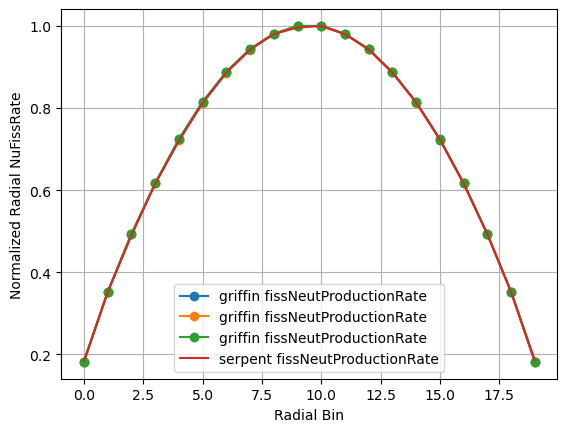

In [157]:
plt.plot(normMaximum(nuFissPlotVals5), label = "griffin fissNeutProductionRate", marker = "o")
plt.plot(normMaximum(nuFissPlotVals10), label = "griffin fissNeutProductionRate", marker = "o")
plt.plot(normMaximum(nuFissPlotVals20), label = "griffin fissNeutProductionRate", marker = "o")
plt.plot(normMaximum(ringNuFiss), label = "serpent fissNeutProductionRate")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

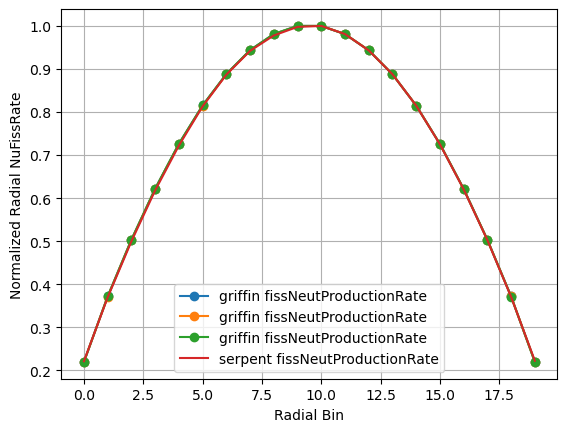

In [158]:
plt.plot(normMaximum(scalarPlotVals5), label = "griffin fissNeutProductionRate", marker = "o")
plt.plot(normMaximum(scalarPlotVals10), label = "griffin fissNeutProductionRate", marker = "o")
plt.plot(normMaximum(scalarPlotVals20), label = "griffin fissNeutProductionRate", marker = "o")
plt.plot(normMaximum(ringCap), label = "serpent fissNeutProductionRate")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

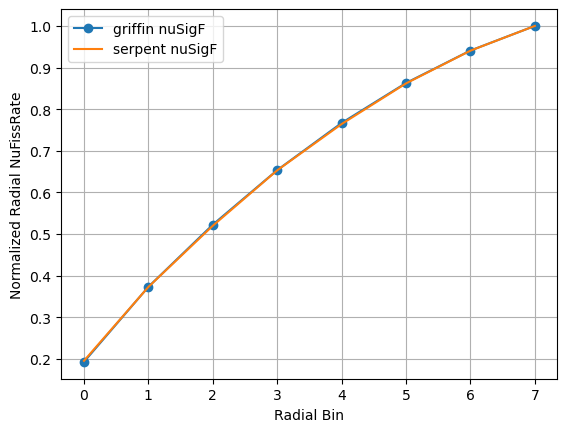

In [159]:
plt.plot(normMaximum(nuFissPlotVals5[0:8]), label = "griffin nuSigF", marker = "o")
plt.plot(normMaximum(ringNuFiss[0:8]), label = "serpent nuSigF")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

In [160]:
ringL2NormDiffNuFiss5 = calcL2NormDiffPerc(normZeroToOne(ringNuFiss), normZeroToOne(nuFissPlotVals5))
print("ring resolution NuFissRate l2normDiff (%): {:.3f}".format(ringL2NormDiffNuFiss5))

ringL2NormDiffNuFiss10 = calcL2NormDiffPerc(normZeroToOne(ringNuFiss), normZeroToOne(nuFissPlotVals10))
print("ring resolution NuFissRate l2normDiff (%): {:.3f}".format(ringL2NormDiffNuFiss10))

ringL2NormDiffNuFiss20 = calcL2NormDiffPerc(normZeroToOne(ringNuFiss), normZeroToOne(nuFissPlotVals20))
print("ring resolution NuFissRate l2normDiff (%): {:.3f}".format(ringL2NormDiffNuFiss20))

ring resolution NuFissRate l2normDiff (%): 0.418
ring resolution NuFissRate l2normDiff (%): 0.344
ring resolution NuFissRate l2normDiff (%): 0.420


In [163]:
# coreNuFissRateRelError = calcPercentRelativeError(normZeroToOne(coreNuFiss), normZeroToOne(griffCoreNuFiss))
# coreNuFissRateRelErrorMap = dict(zip(coreUnis, coreNuFissRateRelError))

ringNuFissRateRelError = calcPercentRelativeError(normMaximum(ringNuFiss), normMaximum(nuFissPlotVals20))
ringNuFissRateRelErrorMap = dict(zip(ringUnis, ringNuFissRateRelError))

ringCaptureRateRelError = calcPercentRelativeError(normMaximum(ringCap), normMaximum(scalarPlotVals20))
ringCaptureRateRelErrorMap = dict(zip(ringUnis, ringCaptureRateRelError))

# elemNuFissRateRelError = calcPercentRelativeError(normZeroToOne(elemNuFiss), normZeroToOne(griffElemNuFiss))
# elemNuFissRateRelErrorMap = dict(zip(elemUnis, elemNuFissRateRelError))

diff: 0.00, comp: 0.18, ref: 0.18, relerror: 1.40
diff: 0.00, comp: 0.35, ref: 0.35, relerror: 0.23
diff: 0.00, comp: 0.49, ref: 0.49, relerror: 0.61
diff: 0.00, comp: 0.62, ref: 0.62, relerror: 0.15
diff: 0.00, comp: 0.72, ref: 0.72, relerror: 0.55
diff: 0.00, comp: 0.82, ref: 0.81, relerror: 0.37
diff: 0.00, comp: 0.89, ref: 0.89, relerror: 0.25
diff: 0.00, comp: 0.94, ref: 0.94, relerror: 0.16
diff: 0.00, comp: 0.98, ref: 0.98, relerror: 0.05
diff: 0.00, comp: 1.00, ref: 1.00, relerror: 0.34
diff: 0.00, comp: 1.00, ref: 1.00, relerror: 0.00
diff: 0.00, comp: 0.98, ref: 0.98, relerror: 0.07
diff: 0.00, comp: 0.94, ref: 0.94, relerror: 0.06
diff: 0.00, comp: 0.89, ref: 0.89, relerror: 0.15
diff: 0.00, comp: 0.81, ref: 0.81, relerror: 0.13
diff: 0.00, comp: 0.72, ref: 0.72, relerror: 0.06
diff: 0.00, comp: 0.62, ref: 0.62, relerror: 0.07
diff: 0.00, comp: 0.49, ref: 0.49, relerror: 0.17
diff: 0.00, comp: 0.35, ref: 0.35, relerror: 0.31
diff: 0.00, comp: 0.18, ref: 0.19, relerror: 2.06


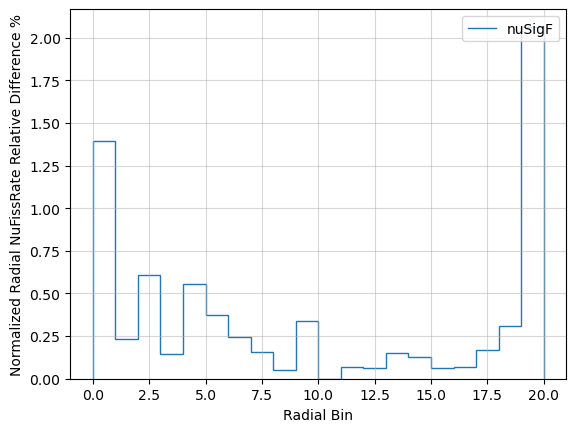

In [164]:
plt.stairs(ringNuFissRateRelError , label = "nuSigF", alpha = 1)
plt.ylabel("Normalized Radial NuFissRate Relative Difference %")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid(alpha = 0.5)

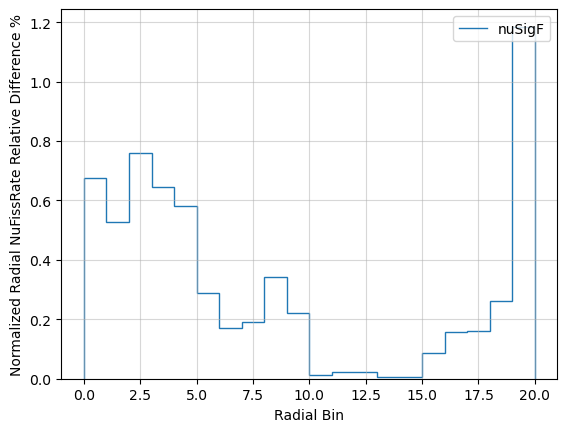

In [165]:
plt.stairs(ringCaptureRateRelError , label = "nuSigF", alpha = 1)
plt.ylabel("Normalized Radial NuFissRate Relative Difference %")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid(alpha = 0.5)

In [166]:
def createAppendCSV(cellData, keys, params, vals, exportPath, useBlockId = False):
    xyz = ['x', 'y', 'z']

    for param in params:
        xyz.append(param)

    appendDF = pd.DataFrame(columns=xyz)

    map = {}

    for key in keys:
        for pdx, param in enumerate(params):
            map[key] = {}
            
    for kdx, key in enumerate(keys):
        for pdx, param in enumerate(params):
            map[key][param] = vals[pdx][kdx]

    
    if not useBlockId:
        pointKeys = np.array(list(cellData['material_id'])).astype('int')
    else:
        pointKeys = []
        blocks = list(cellData['Block Name'])
        for i in range(0, len(blocks)):
            pointKeys.append(int(blocks[i].replace("block_", "")))

    appendDF['x'] = list(cellData['Points_0'])
    appendDF['y'] = list(cellData['Points_1'])
    appendDF['z'] = list(cellData['Points_2'])

    for param in params:
        pointData = []
        for i in range(0, len(pointKeys)):
            pointData.append(map[str(pointKeys[i])][param])
        
        appendDF[param] = pointData

    appendDF.to_csv(exportPath, index=False)
    
    return appendDF

In [263]:
# coreParams = ['nuFissRate', 'nuFissRateRelError']
# coreVals = [getUniValsList(coreGriffMap, 'nufiss'), coreNuFissRateRelError]
# corePath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres_cellPointdataAppend.csv'

ringParams = ['nuFissRate', 'nuFissRateRelError', 'scalarFlux', 'scalarFluxRelError']
ringVals = [getUniValsList(ringGriffMap, 'nufiss'), ringNuFissRateRelError, getUniValsList(ringGriffMap, 'scalar'), ringCaptureRateRelError]
ringPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/fuelAssembly/s83d_fuelassembly_cellPointDataAppend.csv'

# elemParams = ['nuFissRate', 'nuFissRateRelError']
# elemVals = [getUniValsList(elemGriffMap, 'nufiss'), elemNuFissRateRelError]
# elemPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_cellPointdataAppend.csv'

# createAppendCSV(corePointData, coreUnis, coreParams, coreVals, corePath)
createAppendCSV(ringPointData, ringUnis, ringParams, ringVals, ringPath)
# createAppendCSV(elemPointData, elemUnis, elemParams, elemVals, elemPath);

,x,y,z,nuFissRate,nuFissRateRelError,scalarFlux,scalarFluxRelError
0,0.00000,0.83589,1.77800,0.00585,1.24056,0.11226,0.59799
1,0.00636,0.42521,1.77800,0.00585,1.24056,0.11226,0.59799
2,0.36195,0.62692,1.77800,0.00585,1.24056,0.11226,0.59799
3,0.00000,0.83589,0.00000,0.00585,1.24056,0.11226,0.59799
4,0.00636,0.42521,0.00000,0.00585,1.24056,0.11226,0.59799
...,...,...,...,...,...,...,...
755,0.72390,-0.41794,33.78200,0.00584,2.04709,0.11209,1.24515
756,0.72390,-0.00000,35.56000,0.00584,2.04709,0.11209,1.24515
757,0.72390,-0.00000,33.78200,0.00584,2.04709,0.11209,1.24515
758,0.00910,-0.01855,35.56000,0.00584,2.04709,0.11209,1.24515
